## The majority of this notebook is going to be on Support Vector Machines, however before we get to that I wanted to point out a number of sklearn features, of which you should be aware and which you might use.

# The SKLearn Preprocessor

The SKLearn preprocessor is very useful and can do many things for you. These take your raw data and **transform** them into things better suited to ML. Also the SKLearn documentation on them is very good and can be found [here](https://scikit-learn.org/stable/modules/preprocessing.html).

Especially useful are:

* The ability to transfor your data into a more expected range. Many ML approaches expect data in a given range (say between -1 and 1), but your data may be over any range. If your data are far outside the sort of range expected it is possible that they will unduly skew the learning process.  The preprocessor has functions that will transform your data into the expected range -- both linearly and non-linearly.

* Normalizing your data -- really a subset of above but useful on individual matrices as well

* Encoding categorical features. ML algorithms use numbers (generally), however much of the data that you will have is not of that form but is categories in words such as 'Male' or 'Likes Horror Films'. The preprocessor has functions that will transform these into numbers for you.

* Discretization -- turning a continuous variable into a series of categories. A special case is when it turns it into a binary choice i.e. above or below a certain threshold.

* Imputation of missing values - this is alway a tricky one that needs to done with care

* Generating polynomial feature. This is something that you have already used.




## Exercise

I would like you to read through the documentation linked above,  pick out 3 preprocessors and write little examples of them. Two should be of encoding categorical features and adding polynomial features  and one other (may be data imputation or perhaps a scaling).

# Pipelines

These enable you to sequentially run a list of different transformers and a final estimator.

# Saving Models

You will have begun to see that some models can take a long time to train (although you have built so far is too bad but some others will be). This means that once you have trained them you want to keep the trained model. This is most easily done with pickle. See the example below: 

# Saving Models (Edited version)

You will have begun to see that some models can take a long time to train (although the models you have worked with so far aren't too bad, some others will be). This means that once you have trained them you want to keep the trained model. This is most easily done with pickle. See the example below: 

In [38]:
# Back to our iris dataset 
import numpy as np
import scipy as sp 
from sklearn.datasets import load_iris
iris=load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.2) 

from sklearn.neighbors import KNeighborsClassifier
neighbors = 12
weights = "uniform"
#weights="distance"
iris_knn = KNeighborsClassifier(n_neighbors=neighbors,weights=weights)

iris_knn.fit(X_train,y_train)
pred = iris_knn.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

# Looks pretty good so lets keep it

# now pickle it
import pickle as pk
filename = 'model'
outfile = open(filename,'wb')
pk.dump(iris_knn,outfile)
outfile.close()


0.9333333333333333


In [272]:
# Now read it back in
# because of how jupyter notebooks work most of this cell is not actually needed but I am pretending that 
# that this is a separate program being run at a different time 
import numpy as np
import scipy as sp 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle as pk

iris=load_iris()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.5) #different test selection

filename='model'
infile=open(filename,'rb')
knn=pk.load(infile)
pred=knn.predict(X_test)

print(accuracy_score(y_test, pred))

0.9733333333333334


## (Quick) exercise

This is a little artificial, but rerun the two cells above but kill jupyter-notebooks in-between them just to convince yourself that it does actually work.

# Support Vector Machines

SVMs are amongst the most used of all ML techniques. They can classify and regress (although they are more often used in classification in my world). Again [homl](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) is really very clear in describing these and I recommend their description.

If your feature space has N dimensions then the SVM draws a N-1 dimensional surface between the different things that you are tryibg to classify. SVMs are particularly useful when you have moderate volumes of data.

The mathematics of SVM is not difficult and is quite interesting so I suggest that you have a read sometime, but is sadly outside of the scope of this course (only because of lack of time). It is reasonably well described at the bottom of the documentaion [here](https://scikit-learn.org/stable/modules/svm.html).

## Linear SVM Classifiers

Lets consider two linearly  seperable data sets. We can take a subset of our iris data. This is a slight reworking of how it is described in **{homl}**.

In [273]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]



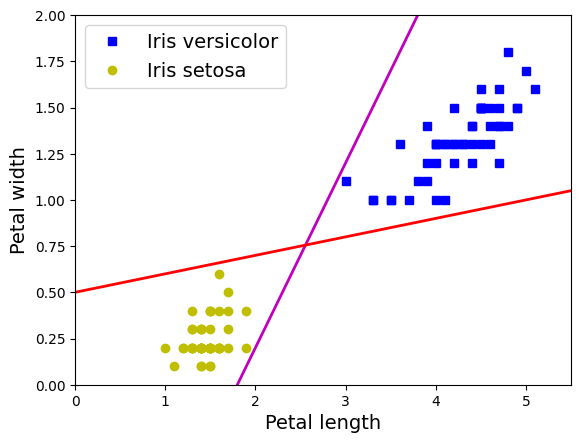

In [276]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()


While you can see that either of these lines perfectly well separates the two different iris types, they are right on the limit and it is very possible that more data of either sort of iris will just cross the boundary and be wrongly classified. In a SVM you try to find the line that provides the greatest separation. So lets try it.

In [292]:
from sklearn.svm import SVC

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=100000000.0) #C = float('inf') was giving an error. put big +ve number instead
svm_clf.fit(X, y)

SVC(C=100000000.0, kernel='linear')

Now lets plot the result.

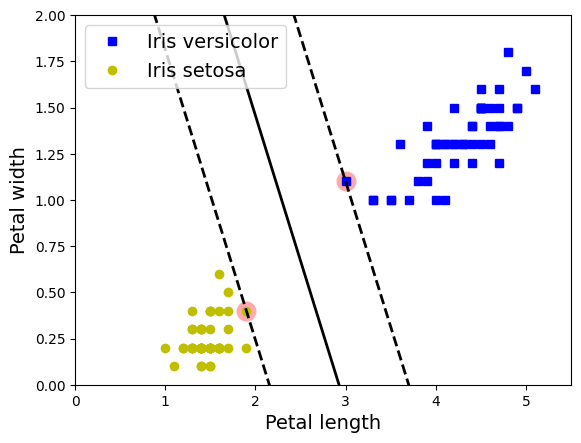

In [293]:
x0 = np.linspace(0, 5.5, 200)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

# retrieve the slope and the intercept
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

# now look at the margins
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

# now get the actual support vectors
svs = svm_clf.support_vectors_

# now draw the lines
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.axis([0, 5.5, 0, 2])

plt.show()

You can see that the SVM has chosen the line that has the greatest separation. The two marked points are nearest two points and these are the actual support vectors. You will also have noticed that adding more data that is "behind" the support vector makes no difference to the selected boundary.

One very valid point noted in **{homl}** is that SVM can very sensitive to feature scale. In the example below (taken from **{homl}** you can see the difference the preprocessor scaling can make.

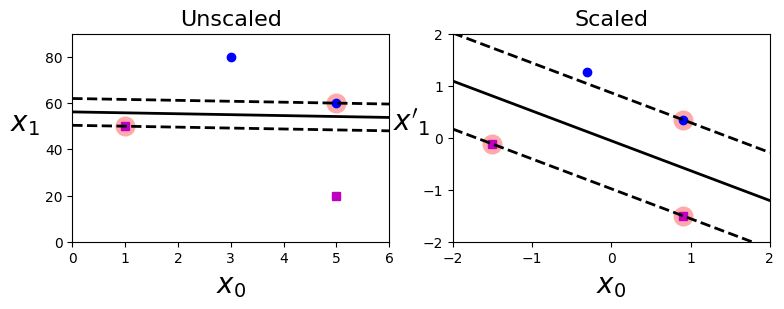

In [294]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear")
svm_clf.fit(Xs, ys)



def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)
    
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Now do the scaling.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

plt.show()

You can see that Scaled plot looks a lot more healthy.

## Soft Margin Classification

What we have been doing so far is call hard margin classification. This has two significant problems. Firstly, the problem has to be linearly separable and secondly it is very sensitive to outliers. Lets see what we get if we introduce outliers into our iris dataset. 



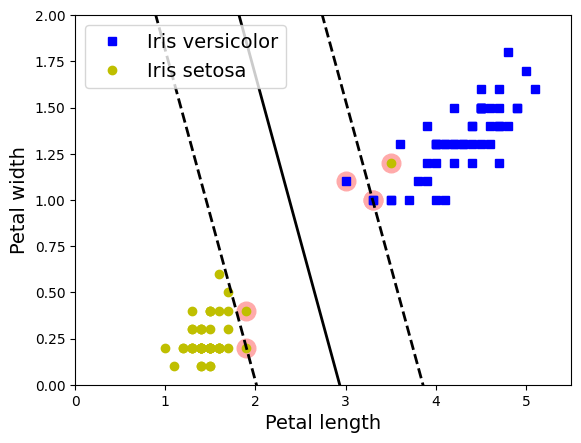

In [295]:
X_mod=X
X_mod=np.append(X,[[3.5,1.2]], axis=0)
y_mod=np.append(y,0)

#fit the new model and plot
svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_mod, y_mod)

x0 = np.linspace(0, 5.5, 200)

plt.plot(X_mod[:, 0][y_mod==1], X_mod[:, 1][y_mod==1], "bs", label="Iris versicolor")
plt.plot(X_mod[:, 0][y_mod==0], X_mod[:, 1][y_mod==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)

# retrieve the slope and the intercept
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

# At the decision boundary, w0*x0 + w1*x1 + b = 0
# => x1 = -w0/w1 * x0 - b/w1
decision_boundary = -w[0]/w[1] * x0 - b/w[1]

# now look at the margins
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin

# now get the actual support vectors
svs = svm_clf.support_vectors_

# now draw the lines
plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.plot(x0, decision_boundary, "k-", linewidth=2)
plt.plot(x0, gutter_up, "k--", linewidth=2)
plt.plot(x0, gutter_down, "k--", linewidth=2)
plt.axis([0, 5.5, 0, 2])

plt.show()

You can see that these data are no longer linearly separable and there is margin violation. There is a hyperparameter **C** than can be tune the behaviour of the SVM in these cases.  C is a regularistion coefficient that you can use to control this behaviour. C must always be positive but can be very small or very large. The default value of C is one.

## Exercise

This is to familiarise yourselves to how C works. Take the code above and add a few more "outliers" and then plot the results for Cgoing from small values (say 0.0001) to quite large values (say 1000000) and try to understand the behaviour.

# Nonlinear SVM Classification

Many problems are linearly separable and many of those that are not become so if you add features with higher polynomial terms (as we did with nonlinear regression). The most common straightforward example of this (and you see it in all the text books) is something like: 

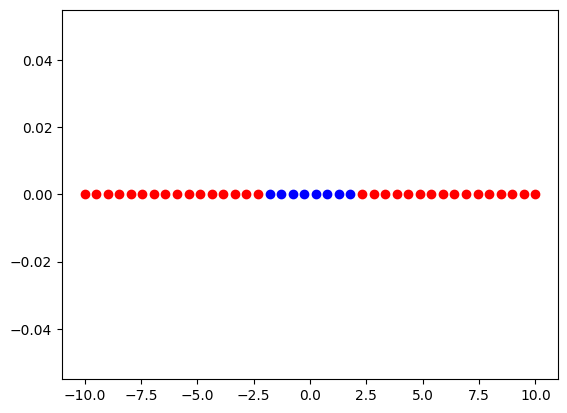

In [296]:
import numpy as np
import pylab as pl

X=np.linspace(-10,10,40)
y= [1 if np.abs(x) > 2 else 0 for x in X]

X_plot1=[X[i] for i in range(len(X)) if y[i]>0]
y_plot1=[0 for i in range(len(X)) if y[i]>0]

X_plot2=[X[i] for i in range(len(X)) if y[i]<1]
y_plot2=[0 for i in range(len(X)) if y[i]<1]

pl.plot(X_plot1,y_plot1,'ro')
pl.plot(X_plot2,y_plot2,'bo')



pl.show()



Clearly this will be separable if add a feature that is the square.

## Exercise

Actually go through the exercise of showing this works using  PolynomialFeatures. 

Now we are going to meet another famous ML data set or rather way of making data sets that appear in text books. These are the SKLearn make moons. Again I am taking a lot from **{homl}**.

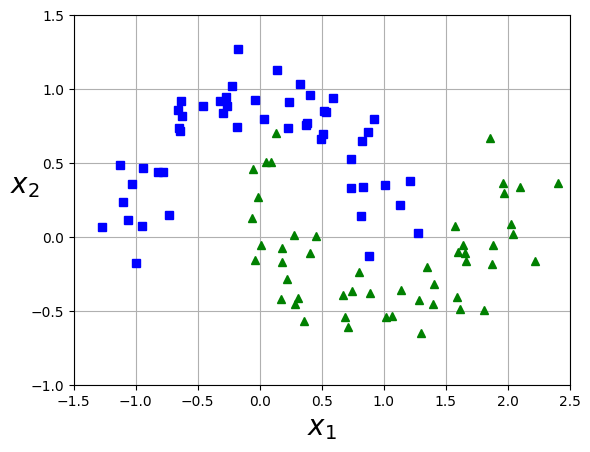

In [297]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

You can see that this creates two intertwined data sets.

In [298]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# so lets add a pipline that adds poly features and scales it.

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="linear", C=1)) # could use LinearSVC(C=10)) as this would be much faster
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, kernel='linear'))])

Now lets plot it

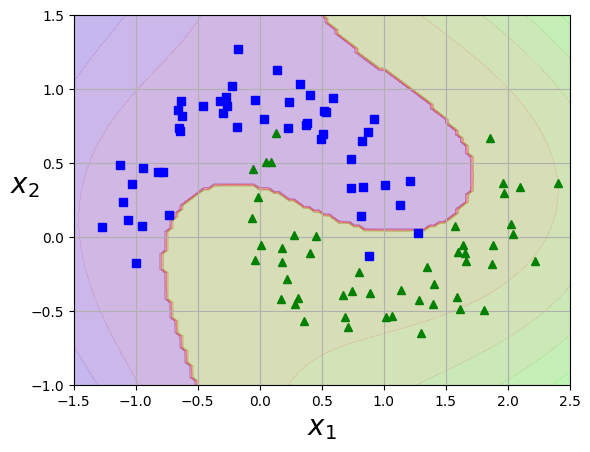

In [299]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])


plt.show()

Not bad at all (try it with different values of C and it might get even better or worse)! Adding polynomial featuures is a useful thing to do and often works. However, it can cause a significant increase in the number of features, especially as you go to higher dimensionality. Also as things get more complicated lower polynomials no longer work well and going to higher ones gives a spiraling number of features. Fortunately we have another trick up our sleeve  -- a kernel trick.  

# Polynomial Kernels

Sadly the maths behind kernel tricks are out of the scope of this practical course -- simply because we don't have enough time. Essentially it builds on pairs of points to have the same effect as adding polynomial features without adding them. It is worth looking up the maths as it is not too hard.

## Add the kernal maths here later

So lets try with a 3rd degree kernel. In the example below coef0 is a hyperparameter that determines how much the model is by high degree polynomials as opposed to low degree ones -- the default value is 0.

In [300]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=100, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, kernel='poly'))])

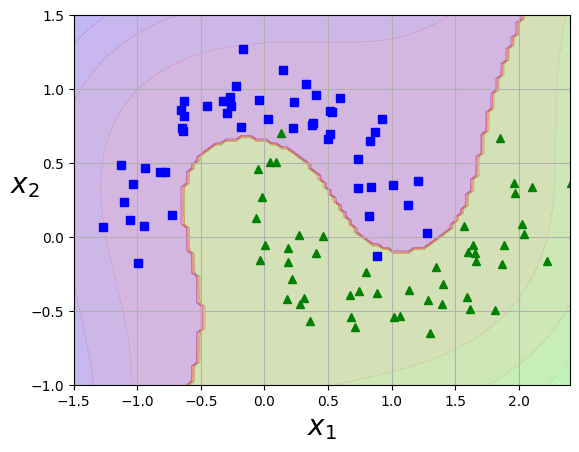

In [301]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])

## Exercise

This is for you to understand the behaviour of the SVM under different values of coef0, C and different degrees. Try changing them up to (say) a degree of ~15 and coef up to 100 with C over a large range.  

## Similarity Features

Another way to add more useful features would be to see the similarity between two points. One way of doing this would be to define a similarity function that is Gaussian *Radial Base Function* (RBF) so that the similarity between two points $x_1$ and $x_2$ is:

$\phi=e^{-\gamma |x_1-x_2|}$

where $\gamma$ is a tunable parameter.

If you then do this for every point you introduce many new features that will almost certainly have discriminating power. However, this procedure  too can result in spiraling number of features. So is there a kernel that can do this for us? Well yes there is.

## Gaussian RBF Kernel

$\gamma$ is a tunable hyperparameter. Increasing $\gamma$ makes the Gaussian narrower and decreasing it makes it broader. So from that point of view you can think of it as a sort of regulariser. It also means that if $\gamma$ is too large you will have a tendency to overfit your data and if it is too small you will have a tendency to underfit your data.

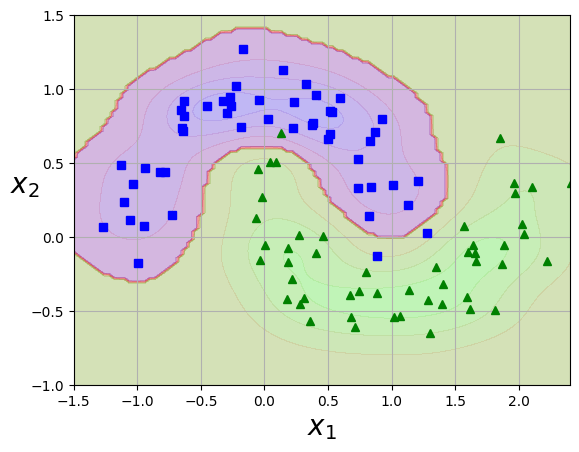

In [302]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.01))
    ])
rbf_kernel_svm_clf.fit(X, y)
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])

 ## Exercise
 
 To understand the effect of $\gamma$ and C try varying them over large ranges (say $0.001 \lt \gamma \lt 50$ and $0.001 \lt$C$\lt 100000$. Do this is a systematic way so that you understand what is going on.

# So with all these tunable hyperparameters how do you decide what values to use?

Well there is no magic answer. Always try to make it linear if you can as LinearSVC is very much faster than SVC(kernel="linear"). Some experience helps, looking at the problem can do as well.  Often a grid scan as you have done with the MNIST dataset is very useful indeed.

# SVM for regression

I don't really use SVM for regression although a lot of people do so I am including some examples straight from **{homl}** so that you know what it is and how to use it.

Whereas when you are using an SVM for classification you are trying to separate the different classes by as far as possible while limiting margin violation, in regression you are trying to do the opposite and include as many as you can within that margin. That margin is controlled by a hyperparameter $\epsilon$. 


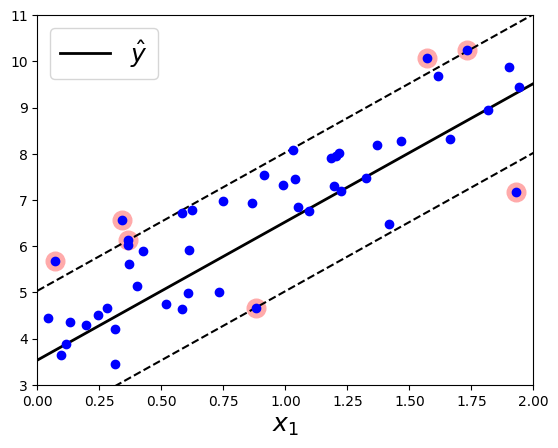

In [303]:
# lets make some data

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()
from sklearn.svm import LinearSVR

# set up the regression
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

# find the support vectors
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg.support_ = find_support_vectors(svm_reg, X, y)

# now lets plot them
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])

## Exercise change the value of $\epsilon$ to see how it effects the regression

Also similar is the nonlinear case when you can use  a polynomial kernel. See the example below.

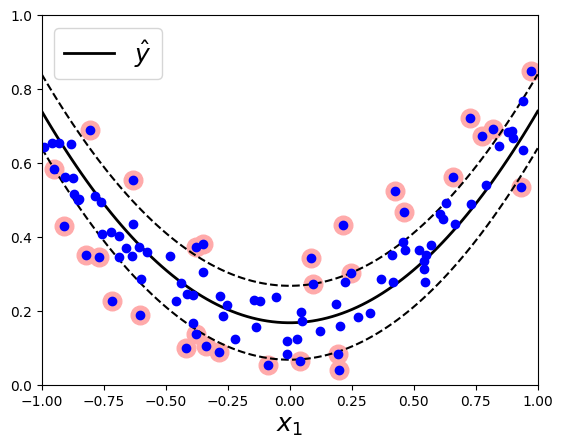

In [304]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])

## Exercise

Again see how this varies with $\epsilon$.